In [8]:
# Import semua library yang dibutuhin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [9]:
# Load dataset CSV
df = pd.read_csv("Data Penjualan Toko Buku.csv")

# Tampilkan 5 baris pertama
df.head()


,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total
0,133889.0,Alat Tulis,1,1/1/2010,Stacy Campos,120000.0
1,133889.0,Buku Sejarah,1,1/1/2010,Stacy Campos,150000.0
2,133889.0,Buku Anak-Anak,2,1/1/2010,Stacy Campos,400000.0
3,133889.0,Majalah Fashion,1,1/1/2010,Stacy Campos,130000.0
4,133889.0,Majalah Berita,2,1/1/2010,Stacy Campos,600000.0


In [11]:
# Cek dan bersihkan data
df.dropna(inplace=True)

# Lihat kolom
print(df.columns)

# Ubah nama kolom biar seragam
df.columns = ['id_transaksi', 'jenis_item', 'jumlah', 'tanggal_pembelian', 'nama_customer', 'total']

# Konversi 'total' dan 'jumlah' ke numerik
df['total'] = pd.to_numeric(df['total'], errors='coerce')
df['jumlah'] = pd.to_numeric(df['jumlah'], errors='coerce')

# Hapus data yang gagal dikonversi
df.dropna(subset=['total', 'jumlah'], inplace=True)

# Cek ulang
df.info()


Index(['id_transaksi', 'jenis_item', 'jumlah', 'tanggal_pembelian',
       'nama_customer', 'total'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 2464 entries, 0 to 2468
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_transaksi       2464 non-null   float64
 1   jenis_item         2464 non-null   object 
 2   jumlah             2464 non-null   int64  
 3   tanggal_pembelian  2464 non-null   object 
 4   nama_customer      2464 non-null   object 
 5   total              2464 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 134.8+ KB


In [13]:
# Grouping data berdasarkan customer
data_customer = df.groupby('nama_customer').agg({
    'id_transaksi': 'count',   # frekuensi kunjungan
    'total': 'sum'             # total pembelian
}).reset_index()

# Ganti nama kolom
data_customer.columns = ['nama_customer', 'frekuensi_kunjungan', 'total_pembelian']

data_customer.head()


,nama_customer,frekuensi_kunjungan,total_pembelian
0,Aaron Salinas,7,27975000.0
1,Alexander Ramos,6,9985000.0
2,Alice Webster,7,16330000.0
3,Alicia Watkins,7,16760000.0
4,Alyssa Berg,5,7080000.0


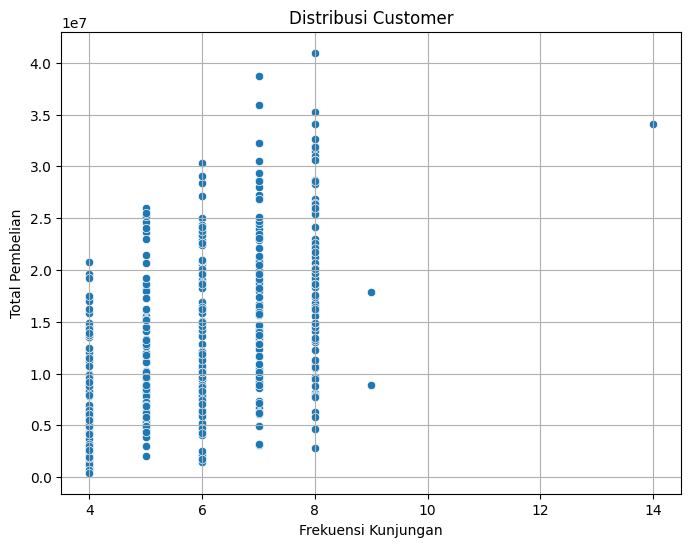

In [14]:
# Visualisasi awal
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_customer, x='frekuensi_kunjungan', y='total_pembelian')
plt.title('Distribusi Customer')
plt.xlabel('Frekuensi Kunjungan')
plt.ylabel('Total Pembelian')
plt.grid(True)
plt.show()


In [15]:
# Siapkan data untuk clustering
X = data_customer[['frekuensi_kunjungan', 'total_pembelian']]

# Uji dengan jumlah cluster = 3 (misalnya)
kmeans = KMeans(n_clusters=3, random_state=42)
data_customer['cluster'] = kmeans.fit_predict(X)


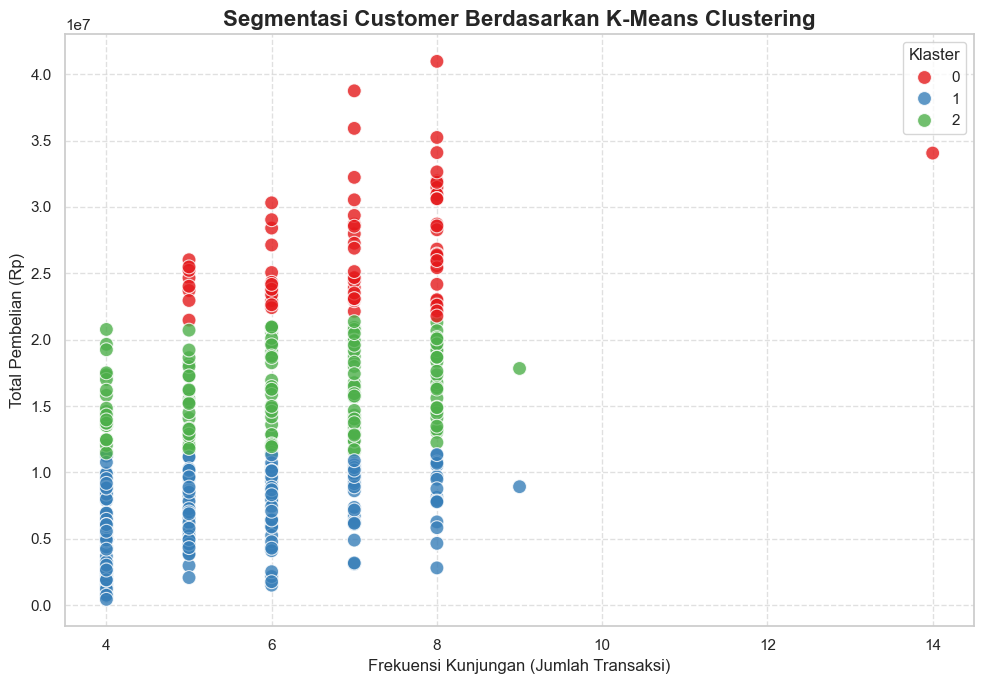

In [19]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Plot clustering
sns.scatterplot(
    data=data_customer,
    x='frekuensi_kunjungan',
    y='total_pembelian',
    hue='cluster',
    palette='Set1',  # Bisa juga: 'viridis', 'Set2', 'coolwarm'
    s=100,           # ukuran titik
    alpha=0.8        # transparansi
)

# Tambahan judul & label
plt.title('Segmentasi Customer Berdasarkan K-Means Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Frekuensi Kunjungan (Jumlah Transaksi)', fontsize=12)
plt.ylabel('Total Pembelian (Rp)', fontsize=12)
plt.legend(title='Klaster', title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [22]:
# Analisa ringkas per klaster
data_customer.groupby('cluster').agg({
    'frekuensi_kunjungan': ['mean', 'max'],
    'total_pembelian': ['mean', 'max'],
    
    'nama_customer': 'count'
})





frekuensi_kunjungan     total_pembelian             nama_customer
                       mean max            mean         max         count
cluster                                                                  
0                  7.135135  14    2.676730e+07  40970000.0            74
1                  5.474576   9    6.766497e+06  11340000.0           177
2                  6.279221   9    1.610516e+07  21355000.0           154

In [24]:
# Nama-nama customer per cluster tanpa duplikat
nama_per_cluster = data_customer.groupby('cluster')['nama_customer'].unique()
print(nama_per_cluster)
for i, names in nama_per_cluster.items():
    print(f"\nCluster {i}:")
    for name in names:
        print(f"- {name}")



cluster
0    [Aaron Salinas, Alyssa Mason, Andrea Bailey, A...
1    [Alexander Ramos, Alyssa Berg, Alyssa Madden, ...
2    [Alice Webster, Alicia Watkins, Amanda Byrd, A...
Name: nama_customer, dtype: object

Cluster 0:
- Aaron Salinas
- Alyssa Mason
- Andrea Bailey
- Ann Guzman
- Barry French
- Becky Edwards
- Belinda Powell
- Benjamin Johnson
- Bonnie Wilson
- Brandon Kramer
- Brandon Maldonado
- Brandy Henry
- Brian Rogers
- Brian Thomas
- Brian Velez
- Brooke Robinson
- Catherine Shaffer
- Charles Parker DDS
- Christopher Gonzalez
- Christy Parrish
- Connie Yang
- Courtney Terry
- Cynthia Townsend
- Daniel Singleton
- Daniel Stewart
- David Beasley
- Diana Long
- Elizabeth Burns
- Eric Owen
- Eric Waters
- Grace Johnson
- Hailey Hutchinson
- Heather Valentine
- James Brown
- James Roy
- Jeffrey Lin DVM
- Jennifer Harper
- Jerome Mayo
- John Greene
- John Roberts
- Jordan Dougherty
- Kathy Oneal
- Kelly Munoz
- Kenneth Brewer
- Kenneth Ortiz
- Kimberly Harris
- Kimberly Webb
- Krist